# FITS File Format

Flexible Image Transport System (FITS) is a standard format for astronomical data, independent of the hardware platform and software environment. A data file in FITS format consists of a series of Header Data Units (**HDUs**), each containing two components: an ASCII text **header** and the binary **data**. The header contains a series of header keywords that describe the data in a particular HDU and the data component immediately follows the header.

The first header in a FITS file is known as the *primary header*, and any number of extensions can follow the primary HDU. The data unit following the primary header must contain either an image or no data at all, but each extension can contain one of several different data types, including images, binary tables, and ASCII text tables. The value of the XTENSION keyword in the extension's header identifies the type of data the extension contains. 

![fits](images/fits_structure.png)

# Read FITS file

[Astropy](http://docs.astropy.org/en/stable/index.html) is a community-driven package intended to contain much of the core functionality and some common tools needed for performing astronomy and astrophysics with Python.

The [astropy.io.fits](http://docs.astropy.org/en/stable/index.html) package provides access to FITS files 

## FITS images

In [1]:
from astropy.io import fits
hdus=fits.open("data/GASP_P5215_IMAGE_FOV_0001.fits")
hdus.info()

Filename: data/GASP_P5215_IMAGE_FOV_0001.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      75   ()      
  1  WHITE IMAGE    1 ImageHDU        31   (330, 330)   float32   


In [2]:
hdr0 = hdus[0].header
hdr1  = hdus[1].header
data = hdus[1].data

# Always remember to close the file!!
hdus.close()


In [3]:
print (data.shape)

(330, 330)


In [4]:
hdr0 # note that the notebook gives a covenient visualization of the header

SIMPLE  =                    T / file does conform to FITS standard             
BITPIX  =                    8 / number of bits per data pixel                  
NAXIS   =                    0 / number of data axes                            
EXTEND  =                    T / FITS dataset may contain extensions            
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H 
DATE    = '2017-01-19T04:05:06' / file creation date (YYYY-MM-DDThh:mm:ss UT)   
ORIGIN  = 'ESO-PARANAL'        / European Southern Observatory                  
TELESCOP= 'ESO-VLT-U4'         / ESO <TEL>                                      
INSTRUME= 'MUSE    '           / Instrument used.                               
RA      =    154.2428278872204 / [deg] 10:16:58.2 RA (J2000) pointing           
DEC     =  -0.2482193525687218 / [deg] -00:14:52.7 DEC (J2000) pointing         
EQUINOX =                200

Standard headers keywords are string with at most 8 characters.

For keywords longer than 8 characters, there is a convention originated at ESO to facilitate such use. It uses a special keyword `HIERARCH` with the actual long keyword following. Astropy supports this convention as well.

In [5]:
hdr1

XTENSION= 'IMAGE   '           / IMAGE extension                                
BITPIX  =                  -32 / number of bits per data pixel                  
NAXIS   =                    2 / number of data axes                            
NAXIS1  =                  330 / length of data axis 1                          
NAXIS2  =                  330 / length of data axis 2                          
PCOUNT  =                    0 / required keyword; must = 0                     
GCOUNT  =                    1 / required keyword; must = 1                     
CRPIX1  =         245.76321227 / Pixel coordinate of reference point            
CRPIX2  =        197.676359948 / Pixel coordinate of reference point            
CD1_1   = -5.55555555555556E-05 / Coordinate transformation matrix element      
CD1_2   =                   0. / Coordinate transformation matrix element       
CD2_1   =                   0. / Coordinate transformation matrix element       
CD2_2   = 5.55555555555556E-

In [6]:
# get data from the header
print (hdr0["INSTRUME"])
print (hdr1["EXTNAME"])

# For HIERARCH (long) keywords, it is not necessary to prepend the 'HIERARCH'
print (hdr0["HIERARCH ESO TEL MOON RA"],hdr0["HIERARCH ESO TEL MOON DEC"])
print (hdr0["ESO TEL MOON RA"],hdr0["ESO TEL MOON DEC"])

MUSE
WHITE IMAGE
278.324956 -18.35389
278.324956 -18.35389


In [7]:
cond0="INSTRUME" in hdr0.keys()
cond1="INSTRUME" in hdr1.keys()

print ("DOES INSTRUME exist in hdr0?",cond0)
print ("DOES INSTRUME exist in hdr01",cond1)

DOES INSTRUME exist in hdr0? True
DOES INSTRUME exist in hdr01 False


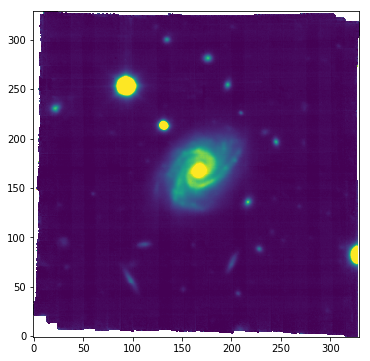

In [8]:
%matplotlib inline 
import matplotlib.pyplot as plt

fig,ax=plt.subplots(figsize=(6,6))
4ax.imshow(data,origin='lower',vmin=0,vmax=30)

## FITS tables
Tables are read the same way as images. You can create a `astropy` `Table`.

We will see how to use `Tables` in the lecture dedicated to `astropy`

In [40]:
from astropy.io import fits
from astropy.table import Table
hdus=fits.open("data/HorseHead.fits")

hdus.info()
ima=hdus[0].data
temp=hdus[1].data # read the table in a temp variable
hdus.close()

tab=Table(tab_) # convert to astropy Table
tab[:3] # print the fitst 3 rows

Filename: data/HorseHead.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     161   (891, 893)   int16   
  1  er.mask       1 TableHDU        25   1600R x 4C   [F6.2, F6.2, F6.2, F6.2]   


XI,ETA,XI_CORR,ETA_CORR
float64,float64,float64,float64
-3.12,-3.12,0.09,0.04
-2.96,-3.12,0.02,0.07
-2.8,-3.12,-0.07,0.15


## Convenience Functions
astropy.io.fits also provides several high level (“convenience”) functions. Such a convenience function is a “canned” operation to achieve one simple task. By using these “convenience” functions, a user does not have to worry about opening or closing a file, all the housekeeping is done implicitly.

Read the [astropy documentation](http://docs.astropy.org/en/stable/io/fits/index.html#convenience-functions)
for a complete list

In [9]:
fits.info("data/GASP_P5215_IMAGE_FOV_0001.fits")

Filename: data/GASP_P5215_IMAGE_FOV_0001.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      75   ()      
  1  WHITE IMAGE    1 ImageHDU        31   (330, 330)   float32   


In [10]:
fits.getheader("data/GASP_P5215_IMAGE_FOV_0001.fits",1)

XTENSION= 'IMAGE   '           / IMAGE extension                                
BITPIX  =                  -32 / number of bits per data pixel                  
NAXIS   =                    2 / number of data axes                            
NAXIS1  =                  330 / length of data axis 1                          
NAXIS2  =                  330 / length of data axis 2                          
PCOUNT  =                    0 / required keyword; must = 0                     
GCOUNT  =                    1 / required keyword; must = 1                     
CRPIX1  =         245.76321227 / Pixel coordinate of reference point            
CRPIX2  =        197.676359948 / Pixel coordinate of reference point            
CD1_1   = -5.55555555555556E-05 / Coordinate transformation matrix element      
CD1_2   =                   0. / Coordinate transformation matrix element       
CD2_1   =                   0. / Coordinate transformation matrix element       
CD2_2   = 5.55555555555556E-

## modify an existing header
you can add, remove and modify header keywords `xxx`

to add or modify a keyword use 
```
hdr.set(keyword,value,comment)
```
comment is optional
if the keyword exisits it is modified, otherwise it is added to the header

If a keyword contains more than 8 characters Astropy will automatically use a HIERARCH card, but will also issue a warning in case this is in error. However, one may explicitly request a HIERARCH card by prepending the keyword with `HIERARCH` (just as it would appear in the header).

In [11]:
hdr=fits.getheader("data/GASP_P5215_IMAGE_FOV_0001.fits",1)
hdr.set("EXTNAME","MYextension","it is just to try")
hdr.set("NEWKEY",123,"it is just to try")
hdr.set("LONGKEYWORD",332)
hdr.remove("ASTROCAL")
hdr

XTENSION= 'IMAGE   '           / IMAGE extension                                
BITPIX  =                  -32 / number of bits per data pixel                  
NAXIS   =                    2 / number of data axes                            
NAXIS1  =                  330 / length of data axis 1                          
NAXIS2  =                  330 / length of data axis 2                          
PCOUNT  =                    0 / required keyword; must = 0                     
GCOUNT  =                    1 / required keyword; must = 1                     
CRPIX1  =         245.76321227 / Pixel coordinate of reference point            
CRPIX2  =        197.676359948 / Pixel coordinate of reference point            
CD1_1   = -5.55555555555556E-05 / Coordinate transformation matrix element      
CD1_2   =                   0. / Coordinate transformation matrix element       
CD2_1   =                   0. / Coordinate transformation matrix element       
CD2_2   = 5.55555555555556E-

## Creating a new FITS image

We will create a new fits file with a primaryHDU and an extension with an image from a numpy array

In [12]:
# create a 2D array that will be the image
import numpy as np
data=np.array([[1,2,4],[5,1,2]])

# create 2 empy headers
hdr0=fits.Header() # this will be used for the primaryHDU
hdr1=fits.Header() # this will be the header associated with the image

# add some keywords to the headers
hdr0.set("name","Marco","creator name")
hdr1.set("OBJECT","some random numbers")
hdr1.set("EXTNAME","MyIMAGE")

# create the primadyHDU and the imageHDU
priHDU=fits.PrimaryHDU(header=hdr0)
imaHDU=fits.ImageHDU(header=hdr1,data=data)

# create the HDUList and save it
hdus=fits.HDUList([priHDU,imaHDU])
hdus.writeto("myfitsima.fits",overwrite=True) # overwrite!! =False if you don't want to overwrite

fits.getheader("myfitsima.fits",1)


XTENSION= 'IMAGE   '           / Image extension                                
BITPIX  =                   64 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                    3                                                  
NAXIS2  =                    2                                                  
PCOUNT  =                    0 / number of parameters                           
GCOUNT  =                    1 / number of groups                               
OBJECT  = 'some random numbers'                                                 
EXTNAME = 'MyIMAGE '                                                            